In [1]:
import itertools
import pickle
import gzip
from PIL import Image
import os
import keras
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import sklearn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_mldata
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd
from mxnet import gluon
import matplotlib.pyplot as plt
import scipy.sparse
import numpy as np
from numpy import array
from numpy import argmax

C:\Users\arinj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load MNIST on Python 3

In [2]:
filename = 'Data/mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

training_data_mat   = training_data[0]
training_data_label = training_data[1]

train_mnist_data = np.reshape(np.array(training_data_mat),(len(training_data_mat),len(training_data_mat[0])))
train_mnist_vector = np.reshape(np.array(training_data_label),(len(training_data_label),1))

validation_data_mat   = validation_data[0]
validation_data_label = validation_data[1]

valid_mnist_data = np.reshape(np.array(validation_data_mat),(len(validation_data_mat),len(validation_data_mat[0])))
valid_mnist_vector = np.reshape(np.array(validation_data_label),(len(validation_data_label),1))

test_data_mat   = test_data[0]
test_data_label = test_data[1]

test_mnist_data = np.reshape(np.array(test_data_mat),(len(test_data_mat),len(test_data_mat[0])))
test_mnist_vector = np.reshape(np.array(test_data_label),(len(test_data_label),1))

print('###################### MNIST dataset ############################')

print(train_mnist_data.shape)
print(train_mnist_vector.shape)
print(valid_mnist_data.shape)
print(valid_mnist_vector.shape)
print(test_mnist_data.shape)
print(test_mnist_vector.shape)


###################### MNIST dataset ############################
(50000, 784)
(50000, 1)
(10000, 784)
(10000, 1)
(10000, 784)
(10000, 1)


# Load USPS on Python 3

In [3]:
USPSMat  = []
USPSTar  = []
curPath  = 'Data/USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
            

In [4]:
usps_data = np.reshape(np.array(USPSMat),(len(USPSMat),len(USPSMat[0])))
usps_vector = np.reshape(np.array(USPSTar),(len(USPSTar),1))

print('###################### USPS dataset ############################')

print(usps_data.shape)
print(usps_vector.shape)


###################### USPS dataset ############################
(19999, 784)
(19999, 1)


# Neural Network Implementation

In [29]:
num_classes=10
image_vector_size=28*28
x_train = train_mnist_data.reshape(train_mnist_data.shape[0], image_vector_size)
x_test = test_mnist_data.reshape(test_mnist_data.shape[0], image_vector_size)
y_train = keras.utils.to_categorical(train_mnist_vector, num_classes)
y_test = keras.utils.to_categorical(test_mnist_vector, num_classes)
image_size = 784
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(image_size,)))    #input layer
model.add(Dense(units=num_classes, activation='softmax'))
model.add(Dense(units=32, activation='relu', input_shape=(image_size,)))     #hidden layer
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=False,validation_split=.1)
loss,accuracy = model.evaluate(x_test, y_test, verbose=False)

print('###################### MNIST dataset ############################')

print('Testing loss:', loss)
print('Testing accuracy:', (accuracy*100) , '%')

###################### MNIST dataset ############################
Testing loss: 0.24471762867569924
Testing accuracy: 94.25 %


In [30]:
prediction = model.predict(x_test)
neural_pred_mnist = np.argmax(prediction,axis=1)
print(neural_pred_mnist)

[7 2 1 ... 4 5 6]


In [31]:
num_classes=10
image_vector_size=28*28
x_train = train_mnist_data.reshape(train_mnist_data.shape[0], image_vector_size)
x_test = usps_data.reshape(usps_data.shape[0], image_vector_size)
y_train = keras.utils.to_categorical(train_mnist_vector, num_classes)
y_test = keras.utils.to_categorical(usps_vector, num_classes)
image_size = 784
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.add(Dense(units=32, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=False,validation_split=.1)
loss,accuracy = model.evaluate(x_test, y_test, verbose=False)

print('####################### USPS dataset ############################')

print('Testing loss:', loss)
print('Testing accuracy:', (accuracy*100) , '%')

####################### USPS dataset ############################
Testing loss: 3.944378959422672
Testing accuracy: 38.70693534527715 %


In [32]:
prediction = model.predict(x_test)
neural_pred_usps = np.argmax(prediction,axis=1)
print(neural_pred_usps)

[0 5 0 ... 9 9 9]


# SVM and Random Forest implementation

In [9]:
# SVM
classifier1 = SVC(kernel='rbf', C=2, gamma = 0.05);
classifier1.fit(train_mnist_data, train_mnist_vector)

C:\Users\arinj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arinj\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
#RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=10);
classifier2.fit(train_mnist_data, train_mnist_vector)

In [10]:
svm_mnist = classifier1.score(test_mnist_data,test_mnist_vector)   #get accuracy
svm_usps  = classifier1.score(usps_data,usps_vector)
rfc_mnist = classifier2.score(test_mnist_data,test_mnist_vector)
rfc_usp   = classifier2.score(usps_data,usps_vector)

In [11]:
svm_pred_mnist = classifier1.predict(test_mnist_data)    #get predictions for confusion matrix later
rfc_pred_mnist = classifier2.predict(test_mnist_data)
svm_pred_usps = classifier1.predict(usps_data)
rfc_pred_usps = classifier2.predict(usps_data)
print(svm_pred_mnist)
print(svm_pred_usps)
print(rfc_pred_mnist)
print(rfc_pred_usps)

[7 2 1 ... 4 5 6]
[2 2 2 ... 3 2 2]
[7 2 1 ... 4 5 6]
[0 9 2 ... 3 3 3]


In [12]:
print('###################### MNIST dataset ############################')

print('Testing accuracy for SVM:', (svm_mnist*100) , '%')
print('Testing accuracy for Random Forest:', (rfc_mnist*100) , '%')

print('\n####################### USPS dataset ############################')

print('Testing accuracy for SVM:', (svm_usps*100) , '%')
print('Testing accuracy for Random Forest:', (rfc_usp*100) , '%')


###################### MNIST dataset ############################
Testing accuracy for SVM: 98.27 %
Testing accuracy for Random Forest: 94.76 %

####################### USPS dataset ############################
Testing accuracy for SVM: 26.14130706535327 %
Testing accuracy for Random Forest: 31.60158007900395 %


# Multiclass Logistic Regression implementation (using gluon libraries)

### (P.S. : implementation without any Python libraries/toolboxes, built-in functions, or external tools/libraries given later)

In [13]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

In [14]:
batch_size = 64
num_inputs = 784
num_outputs = 10
num_examples = 60000
def transform(data, label):
    return data.astype(np.float32)/255, label.astype(np.float32)
train_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=True, transform=transform),
                                      batch_size, shuffle=True)
test_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False, transform=transform),
                              batch_size, shuffle=False)

In [15]:
net = gluon.nn.Dense(num_outputs)
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})
def evaluate_accuracy(data_iterator, net):
    acc = mx.metric.Accuracy()
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(model_ctx).reshape((-1,784))
        label = label.as_in_context(model_ctx)
        output = net(data)
        predictions = nd.argmax(output, axis=1)
        acc.update(preds=predictions, labels=label)
    return acc.get()[1]


In [16]:
evaluate_accuracy(test_data, net)


0.0774

In [17]:
epochs = 25
moving_loss = 0.

for e in range(epochs):
    cumulative_loss = 0
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx).reshape((-1,784))
        label = label.as_in_context(model_ctx)
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        trainer.step(batch_size)
        cumulative_loss += nd.sum(loss).asscalar()

    test_accuracy = evaluate_accuracy(test_data, net)
    train_accuracy = evaluate_accuracy(train_data, net)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" % (e, cumulative_loss/num_examples, (train_accuracy*100), (test_accuracy*100)))

Epoch 0. Loss: 2.140109494447708, Train_acc 79.20333333333333, Test_acc 80.28
Epoch 1. Loss: 0.91577861439387, Train_acc 83.47333333333333, Test_acc 84.63000000000001
Epoch 2. Loss: 0.746075472299258, Train_acc 85.25166666666667, Test_acc 86.06
Epoch 3. Loss: 0.6599705894867579, Train_acc 86.23166666666665, Test_acc 87.02
Epoch 4. Loss: 0.6043649211486181, Train_acc 87.00333333333333, Test_acc 87.48
Epoch 5. Loss: 0.5635527033408483, Train_acc 87.48666666666666, Test_acc 88.11
Epoch 6. Loss: 0.5328374856630961, Train_acc 87.92666666666666, Test_acc 88.35
Epoch 7. Loss: 0.5084304052472115, Train_acc 88.32166666666666, Test_acc 88.63
Epoch 8. Loss: 0.4878199883182843, Train_acc 88.72666666666666, Test_acc 88.92
Epoch 9. Loss: 0.47032041469017666, Train_acc 89.02, Test_acc 89.1
Epoch 10. Loss: 0.4563356133262316, Train_acc 89.31166666666667, Test_acc 89.39
Epoch 11. Loss: 0.4431226115544637, Train_acc 89.375, Test_acc 89.33
Epoch 12. Loss: 0.43155831645329795, Train_acc 89.67666666666668,

# Multiclass Logistic Regression implementation (from scratch)

In [18]:
# determine the probabilities and predictions for each class when given a set of input data

def getProbs(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs

def getPreds(someX):
    prob1 = softmax(np.dot(someX,w))
    pred1 = np.argmax(prob1,axis=1)
    return pred1

# softmax transformation

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

def getAccuracy(someX,someY):
    prob2 = getProbs(someX)
    pred2 = getPreds(someX)
    c = 0;
    for i in range(len(someY)):
        test = someY[i, pred2[i]]
        if  test == 1:
            c+=1
    accuracy = c/(float(len(someY)))        
    return accuracy

# loss function

def getLoss(w,x,y,lam):
    m = x.shape[0] #get the number of training examples    
    scores = np.dot(x,w) #compute raw class scores given current weights
    prob = softmax(scores) #softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y * np.log(prob)) + (lam/2)*np.sum(w*w) #loss of the probabilities (added regularizer)
    grad = (-1 / m) * np.dot(x.T,(y - prob)) + lam*w #gradient for that loss (added regularizer to tune parameters)
    return loss,grad


loss value is 0.27786037285237836


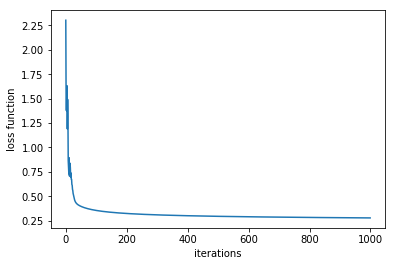

###################### MNIST dataset ############################
Training Accuracy:  92.33200000000001 %
Test Accuracy:  92.22 %
###################### USPS dataset #############################
Test Accuracy:  34.30171508575429 %


In [19]:
# one hot encode
y = to_categorical(train_mnist_vector)

x = train_mnist_data
w = np.zeros([x.shape[1], 10])
lam = 0
iterations = 1000
learningRate = 1
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,x,y,lam)       #get loss
    losses.append(loss)
    w = w - (learningRate * grad)        #update weight by gradient
    
print('loss value is' ,loss)

plt.plot(losses)
plt.ylabel('loss function')
plt.xlabel('iterations')
plt.show()

#Print Accuracy
print('###################### MNIST dataset ############################')

print ('Training Accuracy: ', (getAccuracy(x,y)*100) , '%')
testX = test_mnist_data
testY = to_categorical(test_mnist_vector)
print ( 'Test Accuracy: ', ((getAccuracy(testX,testY))*100) ,'%' )

print('###################### USPS dataset #############################')

testX = usps_data
testY = to_categorical(usps_vector)
print ( 'Test Accuracy: ', ((getAccuracy(testX,testY))*100) ,'%' )


# Bagging Implementation

In [20]:
#function for majority voting

def mostFrequent(arr, n): 
  
    # Sort the array 
    arr.sort() 
  
    # find the max frequency 
    max_count = 1; res = arr[0]; curr_count = 1
      
    for i in range(1, n):  
        if (arr[i] == arr[i - 1]): 
            curr_count += 1
              
        else : 
            if (curr_count > max_count):  
                max_count = curr_count 
                res = arr[i - 1] 
              
            curr_count = 1
      
    # If last element is most frequent 
    if (curr_count > max_count): 
      
        max_count = curr_count 
        res = arr[n - 1] 
      
    return res 

In [21]:
#training data slicing

data_tr = train_mnist_data
vec_tr  = train_mnist_vector
N = 50000

x, y = shuffle(data_tr, vec_tr)

neu_tr  = x[:int(N*0.6)]  #arbitrarily taking 60% data for each bag

svm_tr  = x[:int(N*0.6)]

rfc_tr  = x[:int(N*0.6)]

lgr_tr  = x[:int(N*0.6)]

tar_tr = y[:int(N*0.6)]  #arbitrarily taking 60% data for target

#testing data slicing

data_te = test_mnist_data
vec_te  = test_mnist_vector
N = 10000

x, y = shuffle(data_te, vec_te)

neu_te  = x[:int(N*0.6)]  #arbitrarily taking 60% data for each bag

svm_te  = x[:int(N*0.6)]

rfc_te  = x[:int(N*0.6)]

lgr_te  = x[:int(N*0.6)]

tar_te = y[:int(N*0.6)]  #arbitrarily taking 60% data for target

In [22]:
#model training with new data set

#Neural Network
nnet_y = to_categorical(tar_tr)
history1 = model.fit(neu_tr, nnet_y, batch_size=128, epochs=100, verbose=False,validation_split=.1)
# SVM
classifier1.fit(svm_tr, tar_tr)
#RandomForestClassifier
classifier2.fit(rfc_tr, tar_tr)
#Logistic regression
y = to_categorical(tar_tr)
x = lgr_tr
w = np.zeros([x.shape[1], 10])
lam = 0
iterations = 1000
learningRate = 1
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)

C:\Users\arinj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arinj\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [23]:
# Finding predicted values of each one of the classifiers with test data

prediction_n = model.predict(neu_te)
neu_pred =  np.argmax(prediction_n,axis=1)

svm_pred = classifier1.predict(svm_te)
rfc_pred = classifier2.predict(rfc_te)

lgr_pred = getPreds(lgr_te)

In [24]:
#Bagging algorithm

temp = []
output_bagging = []
for i in range(len(neu_pred)):
    temp = np.append(temp,neu_pred[i])               #saving all predicted values for all classifer in a temp array
    temp = np.append(temp,svm_pred[i])
    temp = np.append(temp,rfc_pred[i])
    temp = np.append(temp,lgr_pred[i])
    output_bagging = np.append(output_bagging,mostFrequent(temp,len(temp))) #creatng output by majority voting
    temp = []
    
output_for_cm_mnist = output_bagging
target_for_cm_mnist = tar_te

print('########################################### MNIST Dataset ####################################################')
print('Testing accuracy:' , (sklearn.metrics.accuracy_score(tar_te.flatten(),output_bagging.flatten()))*100 ,'%')


########################################### MNIST Dataset ####################################################
Testing accuracy: 96.43333333333334 %


In [25]:
#testing data slicing

data_te = usps_data
vec_te  = usps_vector
N = 10000

x, y = shuffle(data_te, vec_te)

neu_te  = x[:int(N*0.6)]  #arbitrarily taking 60% data for each bag

svm_te  = x[:int(N*0.6)]

rfc_te  = x[:int(N*0.6)]

lgr_te  = x[:int(N*0.6)]

tar_te = y[:int(N*0.6)]  #arbitrarily taking 60% data for target

In [26]:
# Finding predicted values of each one of the classifiers with test data

prediction_n = model.predict(neu_te)
neu_pred =  np.argmax(prediction_n,axis=1)

svm_pred = classifier1.predict(svm_te)
rfc_pred = classifier2.predict(rfc_te)

lgr_pred = getPreds(lgr_te)

In [27]:
#Bagging algorithm

temp = []
output_bagging = []
for i in range(len(neu_pred)):
    temp = np.append(temp,neu_pred[i])
    temp = np.append(temp,svm_pred[i])
    temp = np.append(temp,rfc_pred[i])
    temp = np.append(temp,lgr_pred[i])
    output_bagging = np.append(output_bagging,mostFrequent(temp,len(temp)))
    temp = []

output_for_cm_usps = output_bagging
target_for_cm_usps = tar_te


print('########################################### USPS Dataset ####################################################')
print('Testing accuracy:' , (sklearn.metrics.accuracy_score(tar_te.flatten(),output_bagging.flatten()))*100 ,'%')


########################################### USPS Dataset ####################################################
Testing accuracy: 36.46666666666666 %


# Confusion Matrix using MNIST data

############################################ Logistic Regression ##################################################
Confusion matrix, without normalization
[[ 964    0    0    1    0    2    8    1    4    0]
 [   0 1114    2    2    1    2    4    2    8    0]
 [   5    9  922   13    9    4   12   10   42    6]
 [   2    1   21  920    0   26    1    9   21    9]
 [   1    1    7    1  915    0   11    2    9   35]
 [  10    2    5   35   11  758   17    7   39    8]
 [  10    3    4    1   11   11  913    2    3    0]
 [   1    6   22    9    7    1    0  943    3   36]
 [   8    8    7   20    9   27    9   13  866    7]
 [  10    6    2    9   35   12    0   24    7  904]]
Normalized confusion matrix
[[9.84e-01 0.00e+00 0.00e+00 1.02e-03 0.00e+00 2.04e-03 8.16e-03 1.02e-03
  4.08e-03 0.00e+00]
 [0.00e+00 9.81e-01 1.76e-03 1.76e-03 8.81e-04 1.76e-03 3.52e-03 1.76e-03
  7.05e-03 0.00e+00]
 [4.84e-03 8.72e-03 8.93e-01 1.26e-02 8.72e-03 3.88e-03 1.16e-02 9.69e-03
  4.07e-02 5.81e-03]


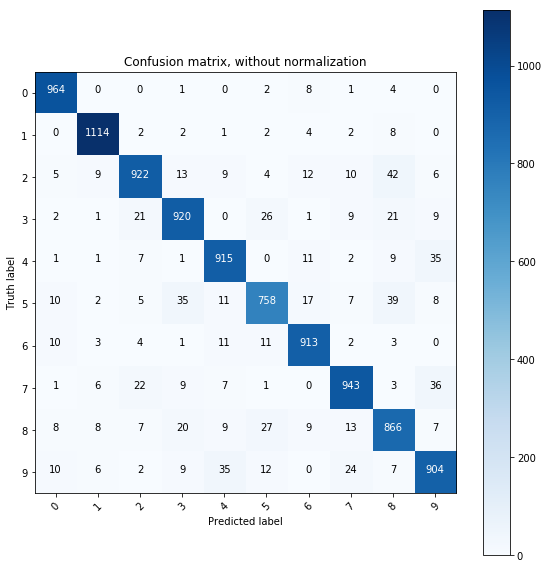

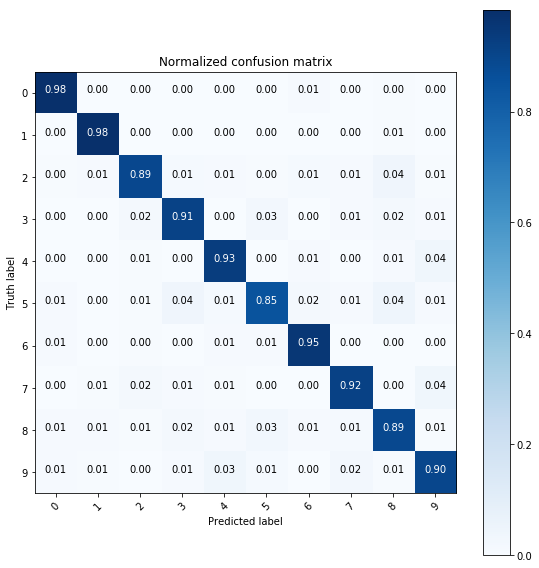

##################################################################################################################
############################################# Neural Network #####################################################
Confusion matrix, without normalization
[[ 963    0    5    0    2    1    6    2    0    1]
 [   0 1116    7    1    0    1    1    2    7    0]
 [  12   10  958    0    0    2   17    4   29    0]
 [   0    0    0  957    0   15    0    4   34    0]
 [  11    0    0    0  919    3    6    0    2   41]
 [   9    0    3   13    5  840    1    1   16    4]
 [  26    2   15    0    1    0  913    0    1    0]
 [   1   19   11    3    0    0    0  977    6   11]
 [   2    0   76    9    1   18    0    4  860    4]
 [   6    1    0    1   11   21    0   32    4  933]]
Normalized confusion matrix
[[9.83e-01 0.00e+00 5.10e-03 0.00e+00 2.04e-03 1.02e-03 6.12e-03 2.04e-03
  0.00e+00 1.02e-03]
 [0.00e+00 9.83e-01 6.17e-03 8.81e-04 0.00e+00 8.81e-04 8.81e-04 1.76e-03
  

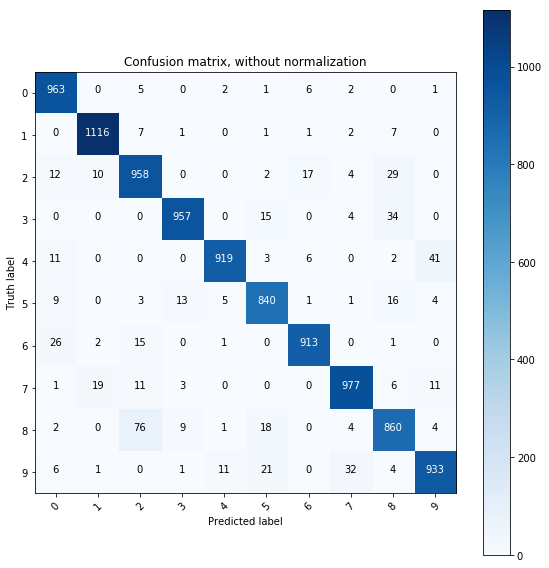

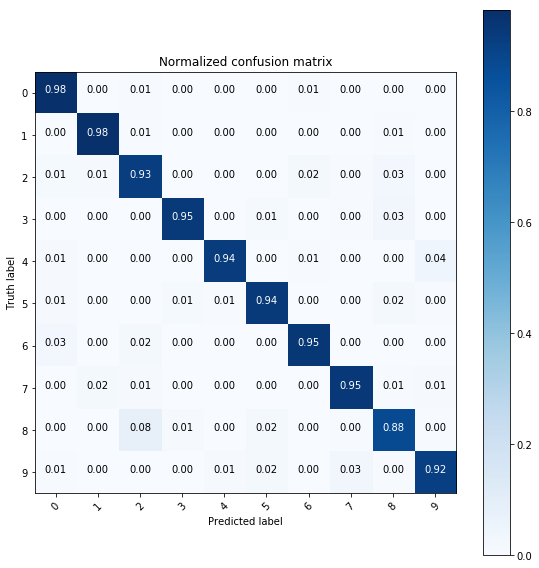

##################################################################################################################
###################################### Support Vector Machine (SVM) ##############################################
Confusion matrix, without normalization
[[ 974    0    1    0    0    1    1    1    2    0]
 [   0 1128    3    1    0    1    0    1    1    0]
 [   4    0 1015    1    1    0    0    6    5    0]
 [   0    0    1  997    0    3    0    5    4    0]
 [   0    1    3    0  964    0    4    0    2    8]
 [   2    0    1    7    1  872    3    1    4    1]
 [   5    2    0    0    2    3  945    0    1    0]
 [   0    3    9    1    1    0    0 1004    2    8]
 [   2    0    1    6    1    2    0    2  958    2]
 [   4    4    2    8    7    2    0    6    6  970]]
Normalized confusion matrix
[[9.94e-01 0.00e+00 1.02e-03 0.00e+00 0.00e+00 1.02e-03 1.02e-03 1.02e-03
  2.04e-03 0.00e+00]
 [0.00e+00 9.94e-01 2.64e-03 8.81e-04 0.00e+00 8.81e-04 0.00e+00 8.81e-04
  

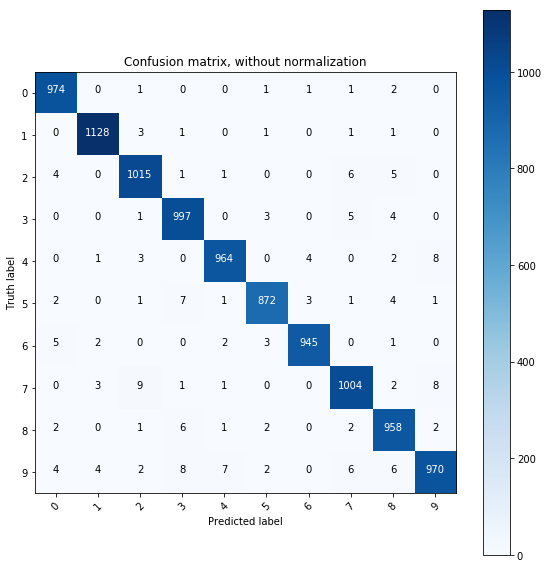

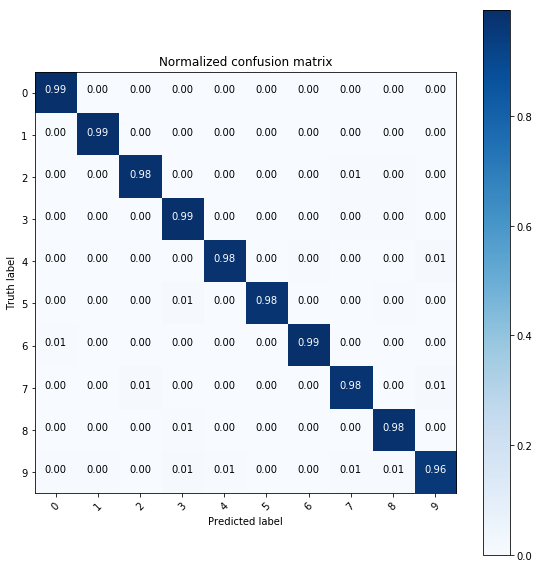

##################################################################################################################
############################################## Random Forest #####################################################
Confusion matrix, without normalization
[[ 963    0    0    0    2    3    6    2    2    2]
 [   0 1125    2    1    0    1    2    1    3    0]
 [   8    0  980   14    5    3    3   10    8    1]
 [   4    0   22  940    1   10    2   11   15    5]
 [   2    1    8    1  928    0    8    1    5   28]
 [   6    1    2   26    5  831    9    0    7    5]
 [  11    2    4    0    8    6  924    0    3    0]
 [   1    5   26    5    4    1    0  972    2   12]
 [   3    2   10   26    7   18    6    6  885   11]
 [   7    6    5   11   25    4    2    8   13  928]]
Normalized confusion matrix
[[9.83e-01 0.00e+00 0.00e+00 0.00e+00 2.04e-03 3.06e-03 6.12e-03 2.04e-03
  2.04e-03 2.04e-03]
 [0.00e+00 9.91e-01 1.76e-03 8.81e-04 0.00e+00 8.81e-04 1.76e-03 8.81e-04
  

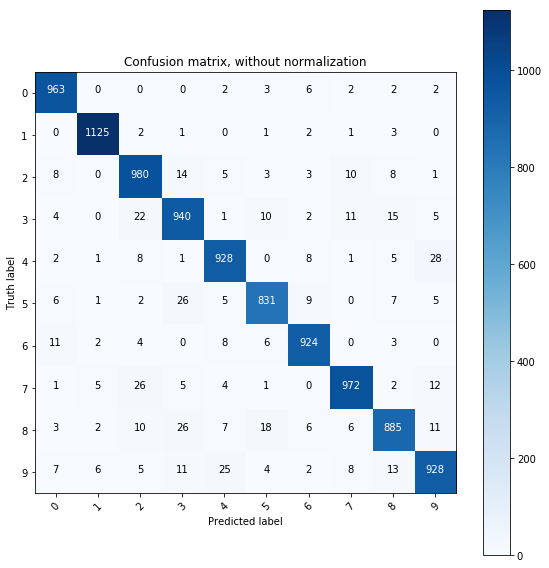

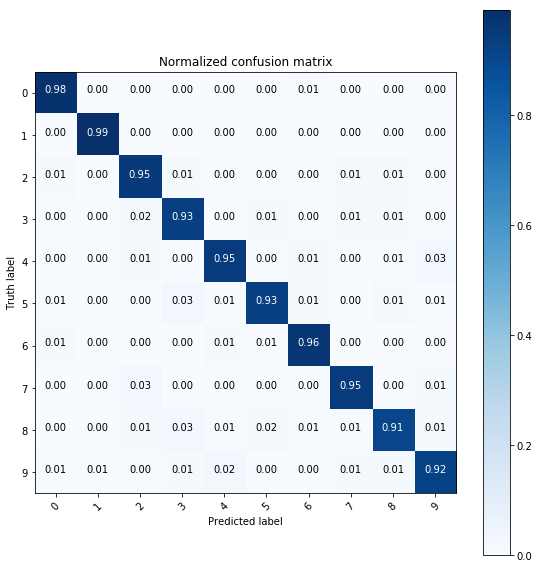

##################################################################################################################
################################################# Bagging  #######################################################
Confusion matrix, without normalization
[[587   1   1   0   0   2   3   1   1   0]
 [  0 686   3   0   0   2   1   0   2   0]
 [  4   0 579   4   2   0   0   5   4   1]
 [  0   0   7 601   0   3   0   5   4   0]
 [  0   0   2   0 572   0   3   1   1   8]
 [  3   2   3   8   2 506   5   1   3   1]
 [  8   3   0   1   3   3 550   0   0   0]
 [  1   3  16   1   2   0   0 597   1   2]
 [  2   2   5   2   5   6   0   2 563   3]
 [  5   6   2   7  11   2   0   7   4 545]]
Normalized confusion matrix
[[0.98 0.   0.   0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.97 0.01 0.   0.   0.   0.01 0.01 0.  ]
 [0.   0.   0.01 0.97 0.   0.   0.   0.01 0.01 0.  ]
 [0.   0.   0.   0.   0.97 0.   0.01 0.   0.   0.01]
 [0.01

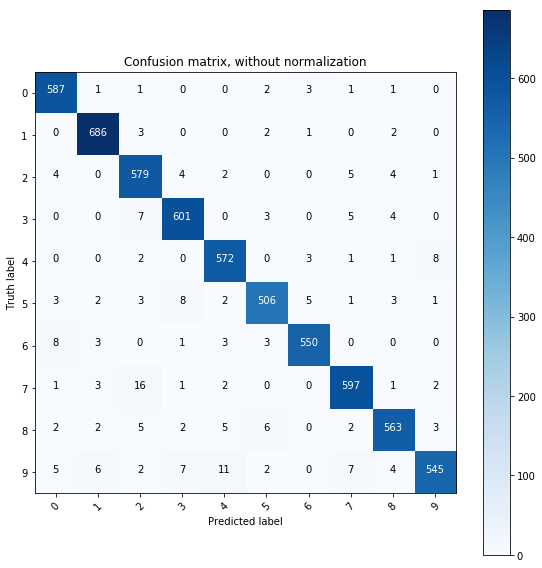

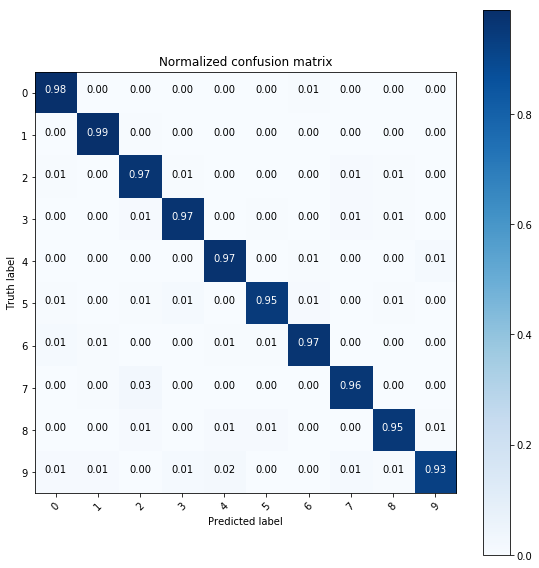

##################################################################################################################


In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.rcParams["figure.figsize"] = (8,8)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Truth label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
print('############################################ Logistic Regression ##################################################')

# Compute confusion matrix
class_names = [0,1,2,3,4,5,6,7,8,9]
y_test = test_mnist_vector
y_pred = getPreds(test_mnist_data)
cnf_matrix = confusion_matrix(y_test, y_pred)    #sklearns function for confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,                                  #just counting, no normalization
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('##################################################################################################################')

print('############################################# Neural Network #####################################################')

# Compute confusion matrix
class_names = [0,1,2,3,4,5,6,7,8,9]
y_test = test_mnist_vector
y_pred = neural_pred_mnist
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('##################################################################################################################')

print('###################################### Support Vector Machine (SVM) ##############################################')

# Compute confusion matrix
class_names = [0,1,2,3,4,5,6,7,8,9]
y_test = test_mnist_vector
y_pred = svm_pred_mnist
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('##################################################################################################################')

print('############################################## Random Forest #####################################################')

# Compute confusion matrix
class_names = [0,1,2,3,4,5,6,7,8,9]
y_test = test_mnist_vector
y_pred = rfc_pred_mnist
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('##################################################################################################################')

print('################################################# Bagging  #######################################################')

# Compute confusion matrix
class_names = [0,1,2,3,4,5,6,7,8,9]
y_test = target_for_cm_mnist
y_pred = output_for_cm_mnist
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('##################################################################################################################')


# Confusion Matrix using USPS data

############################################ Logistic Regression ##################################################
Confusion matrix, without normalization
[[ 527    1  213   96  146  310   53  152  124  378]
 [ 109  296  274  216  269  143   17  456  196   24]
 [ 126   15 1274  147   37  180   67   49   73   31]
 [  50    2  223 1090    8  480    5   63   58   21]
 [  56   43   54   46  916  132   29  273  277  174]
 [ 104    9  260  192   28 1172   72   65   77   21]
 [ 170    5  568   88   56  379  652   19   19   44]
 [ 151  117  164  608   50  112    9  429  288   72]
 [ 260   18  151  315   82  599  107   62  336   70]
 [  19   72  124  520  110   94   13  503  323  222]]
Normalized confusion matrix
[[2.64e-01 5.00e-04 1.06e-01 4.80e-02 7.30e-02 1.55e-01 2.65e-02 7.60e-02
  6.20e-02 1.89e-01]
 [5.45e-02 1.48e-01 1.37e-01 1.08e-01 1.35e-01 7.15e-02 8.50e-03 2.28e-01
  9.80e-02 1.20e-02]
 [6.30e-02 7.50e-03 6.37e-01 7.35e-02 1.85e-02 9.00e-02 3.35e-02 2.45e-02
  3.65e-02 1.55e-02]


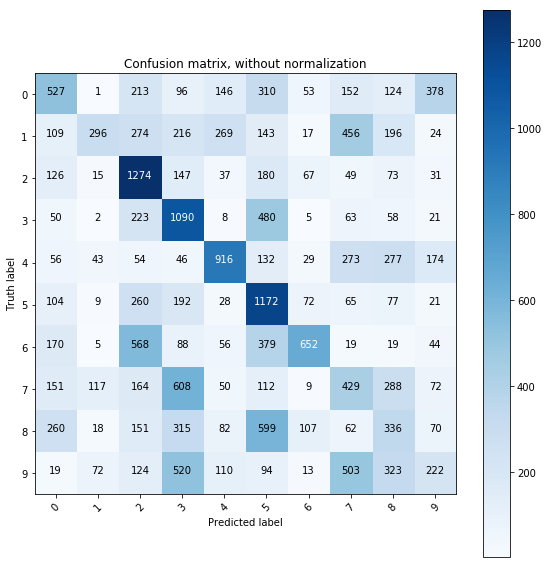

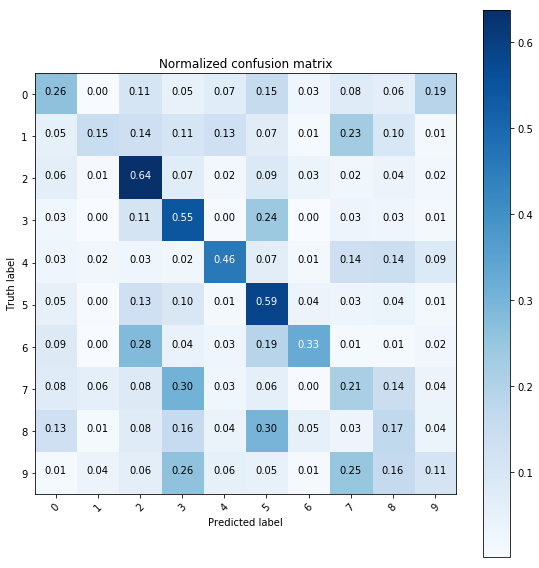

##################################################################################################################
############################################# Neural Network #####################################################
Confusion matrix, without normalization
[[ 378    0   99  374  129  267  141  106  166  340]
 [   8  255  575  135  115  139   44  454  108  167]
 [  26   11  979  434   38  165   30   27  256   33]
 [  67    0  164 1037    6  514    5   20  172   15]
 [  15   12   83   71  901  107   67  208  189  347]
 [  73    0   31  462   20 1102   14    9  252   37]
 [ 221    5  221  404  144  172  752    6   48   27]
 [  49   58  493  377   19  109   49  531  163  152]
 [ 142    2  121  444  107  489   74   31  496   94]
 [  25   22  217  265  115  122   32  353  399  450]]
Normalized confusion matrix
[[0.19 0.   0.05 0.19 0.06 0.13 0.07 0.05 0.08 0.17]
 [0.   0.13 0.29 0.07 0.06 0.07 0.02 0.23 0.05 0.08]
 [0.01 0.01 0.49 0.22 0.02 0.08 0.02 0.01 0.13 0.02]
 [0.03 0.   

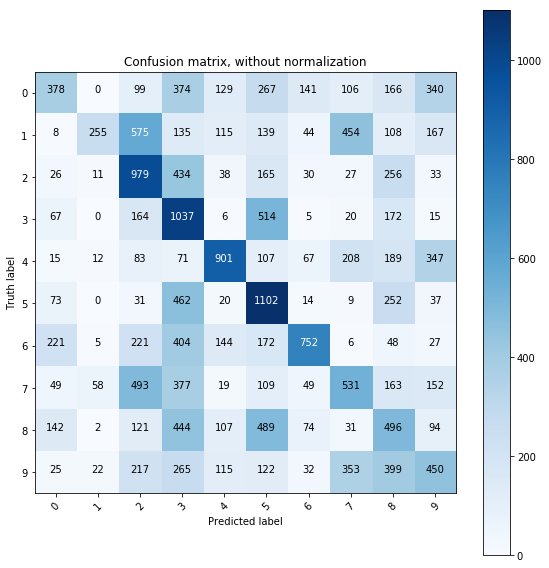

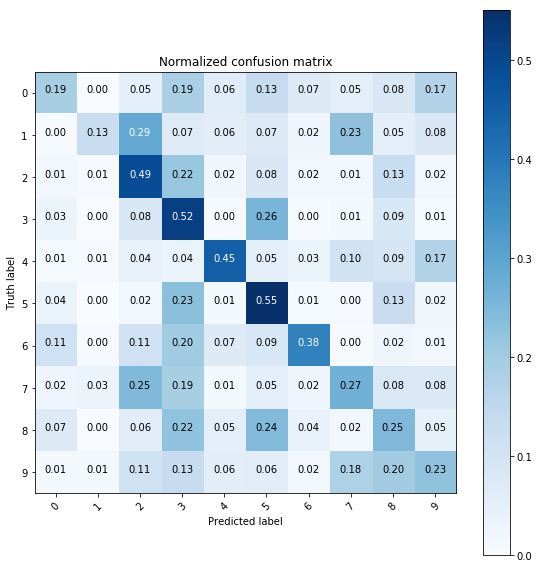

##################################################################################################################
###################################### Support Vector Machine (SVM) ##############################################
Confusion matrix, without normalization
[[ 226    0 1564    2   26   35    2    0   79   66]
 [  78  257  713  172  262   77   12  337   88    4]
 [   8    0 1944    6    2   20    1    6   11    1]
 [   4    0 1193  725    0   41    0    0   37    0]
 [   6    0 1045   18  522   96    0   56  252    5]
 [  15    0 1305   16    1  626    0    0   37    0]
 [  78    0 1534    2   10   61  290    0   22    3]
 [  17    6 1435  129    6  134    0  220   52    1]
 [   7    0 1387   14    4  221    0    0  367    0]
 [   1    0 1508   79   26   29    0   39  267   51]]
Normalized confusion matrix
[[1.13e-01 0.00e+00 7.82e-01 1.00e-03 1.30e-02 1.75e-02 1.00e-03 0.00e+00
  3.95e-02 3.30e-02]
 [3.90e-02 1.29e-01 3.56e-01 8.60e-02 1.31e-01 3.85e-02 6.00e-03 1.69e-01
  

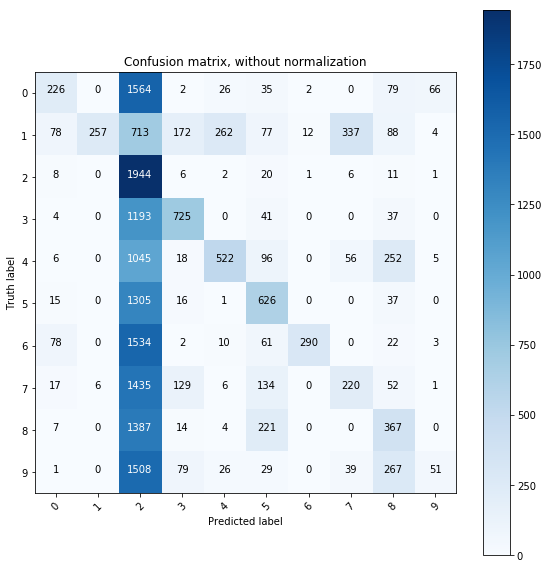

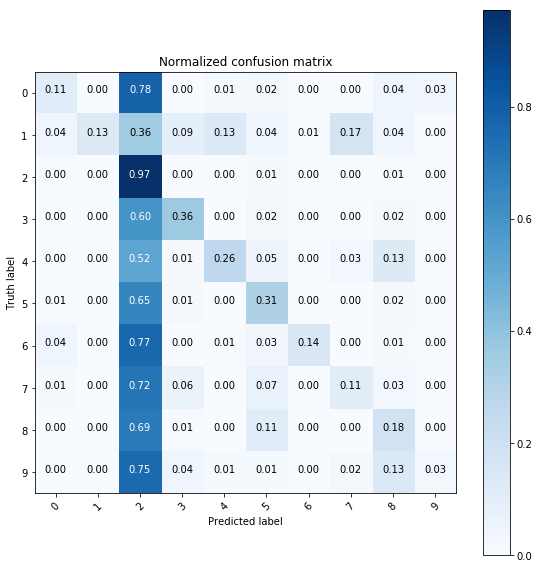

##################################################################################################################
############################################## Random Forest #####################################################
Confusion matrix, without normalization
[[604  26 321  66 359 135 120 124  17 228]
 [134 599 118 125 189  65  52 688  19  11]
 [228  77 970 139 110 160  69 202  20  24]
 [119  45 259 903 123 318  22 133  32  46]
 [ 60 265 126  55 948 139  46 298  25  38]
 [228  65 202 216 103 898  90 146  24  28]
 [422  69 307  85 174 209 576 101  19  38]
 [152 290 523 183  75 123  50 573  12  19]
 [173 114 302 244 170 589 108 114 133  53]
 [ 77 244 360 293 232 128  39 444  67 116]]
Normalized confusion matrix
[[0.3  0.01 0.16 0.03 0.18 0.07 0.06 0.06 0.01 0.11]
 [0.07 0.3  0.06 0.06 0.09 0.03 0.03 0.34 0.01 0.01]
 [0.11 0.04 0.49 0.07 0.06 0.08 0.03 0.1  0.01 0.01]
 [0.06 0.02 0.13 0.45 0.06 0.16 0.01 0.07 0.02 0.02]
 [0.03 0.13 0.06 0.03 0.47 0.07 0.02 0.15 0.01 0.02]
 [0.11

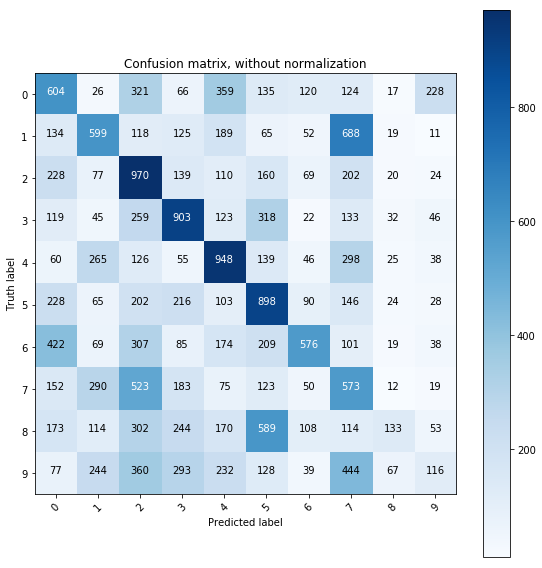

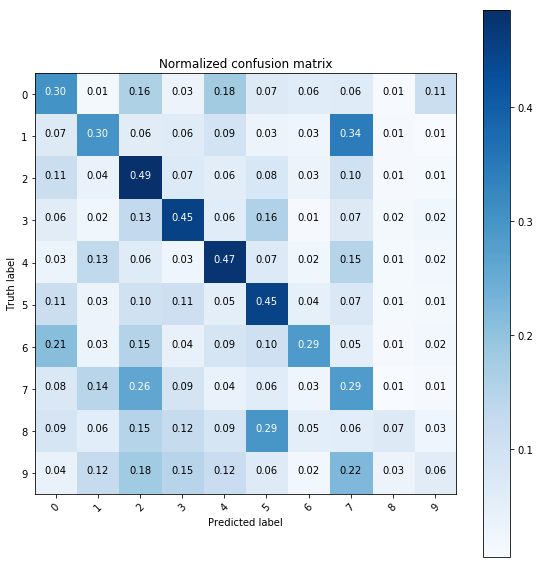

##################################################################################################################
################################################# Bagging  #######################################################
Confusion matrix, without normalization
[[206  10 181  11  20  34  10  15   9  72]
 [ 30 124 159  46  68  31   3 117  17   2]
 [ 32   7 498  23   5  27   4   8   2   1]
 [ 24  10 154 295   1  82   0   2   5   1]
 [ 14  37 102   6 290  29   3  53  64  17]
 [ 58  14 162  37   7 330   1   8  16   2]
 [104  10 270  17   9  37 165   4   1   1]
 [ 41  71 234  68   5  37   3 134  17   6]
 [ 90  16 163  47  18 138  10   6  99   5]
 [ 16  42 213  78  23  12   1  93  53  47]]
Normalized confusion matrix
[[0.36 0.02 0.32 0.02 0.04 0.06 0.02 0.03 0.02 0.13]
 [0.05 0.21 0.27 0.08 0.11 0.05 0.01 0.2  0.03 0.  ]
 [0.05 0.01 0.82 0.04 0.01 0.04 0.01 0.01 0.   0.  ]
 [0.04 0.02 0.27 0.51 0.   0.14 0.   0.   0.01 0.  ]
 [0.02 0.06 0.17 0.01 0.47 0.05 0.   0.09 0.1  0.03]
 [0.09

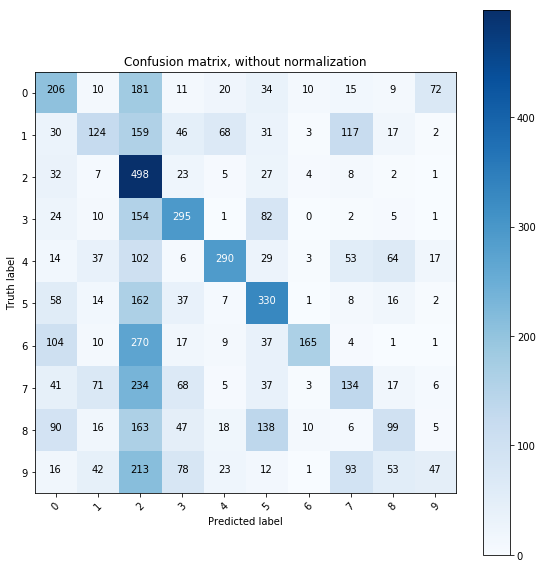

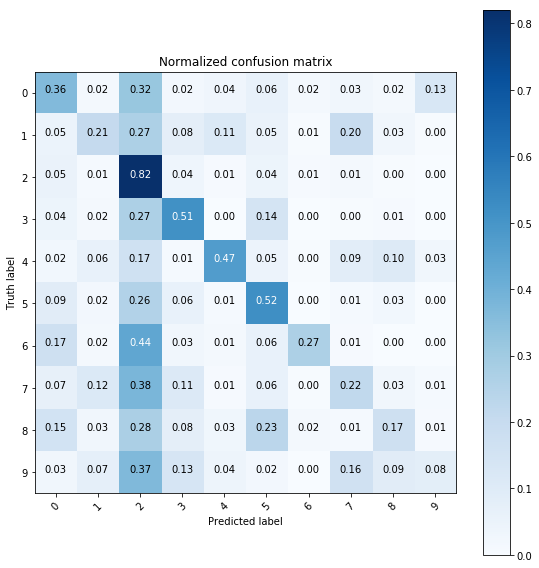

##################################################################################################################


In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.rcParams["figure.figsize"] = (8,8)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Truth label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
print('############################################ Logistic Regression ##################################################')

# Compute confusion matrix
class_names = [0,1,2,3,4,5,6,7,8,9]
y_test = usps_vector
y_pred = getPreds(usps_data)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('##################################################################################################################')

print('############################################# Neural Network #####################################################')

# Compute confusion matrix
class_names = [0,1,2,3,4,5,6,7,8,9]
y_test = usps_vector
y_pred = neural_pred_usps
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('##################################################################################################################')

print('###################################### Support Vector Machine (SVM) ##############################################')

# Compute confusion matrix
class_names = [0,1,2,3,4,5,6,7,8,9]
y_test = usps_vector
y_pred = svm_pred_usps
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('##################################################################################################################')

print('############################################## Random Forest #####################################################')

# Compute confusion matrix
class_names = [0,1,2,3,4,5,6,7,8,9]
y_test = usps_vector
y_pred = rfc_pred_usps
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('##################################################################################################################')

print('################################################# Bagging  #######################################################')

# Compute confusion matrix
class_names = [0,1,2,3,4,5,6,7,8,9]
y_test = target_for_cm_usps
y_pred = output_for_cm_usps
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('##################################################################################################################')


# Boosting implementation

In [5]:
import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [8]:
X = np.concatenate((train_mnist_data,valid_mnist_data,test_mnist_data),axis=0)
print(X.shape)
y = np.concatenate((train_mnist_vector,valid_mnist_vector,test_mnist_vector),axis=0)
y = y.reshape((-1)) 
print(y.shape)

(70000, 784)
(70000,)


In [9]:
clf = RandomForestClassifier(n_estimators=10);  #base classifier for boosting

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

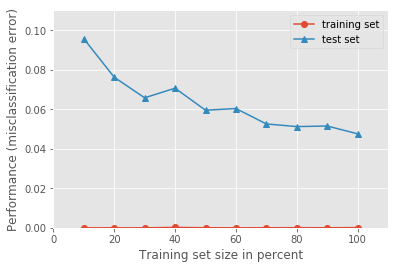

In [10]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=10)          #boosting on random forest
        
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model=False, style='ggplot')
plt.show()

In [11]:
#Ensemble Size
num_est = map(int, np.linspace(1,100,20))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

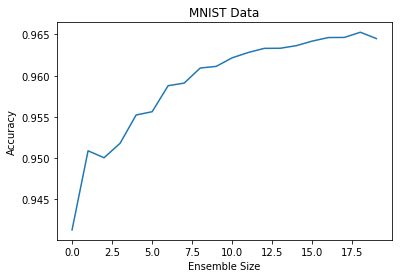

In [12]:
plt.figure()
plt.plot(bg_clf_cv_mean)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('MNIST Data');
plt.show()

In [13]:
print('##################################################### MNIST Data ##################################################')
print('Testing Accuracy :' , (bg_clf_cv_mean[-1]*100) , '%')

##################################################### MNIST Data ##################################################
Testing Accuracy : 96.44999927935275 %


In [14]:
X = usps_data
print(X.shape)
y = usps_vector
y = y.reshape((-1)) 
print(y.shape)

(19999, 784)
(19999,)


In [15]:
#Ensemble Size
num_est = map(int, np.linspace(1,100,20))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

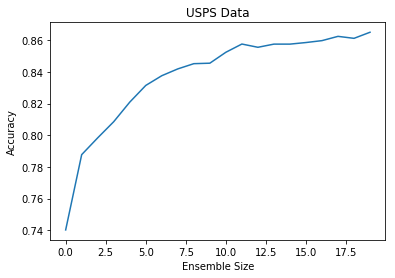

In [16]:
plt.figure()
plt.plot(bg_clf_cv_mean)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('USPS Data');
plt.show()

In [17]:
print('##################################################### USPS Data ##################################################')
print('Testing Accuracy :' , (bg_clf_cv_mean[-1]*100) , '%')

##################################################### USPS Data ##################################################
Testing Accuracy : 86.50422006862208 %


# Stacking implementation (Warning : takes at least 5 hrs to run)

In [6]:
X = np.concatenate((train_mnist_data,valid_mnist_data,test_mnist_data),axis=0)
print(X.shape)
y = np.concatenate((train_mnist_vector,valid_mnist_vector,test_mnist_vector),axis=0)
y = y.reshape((-1)) 
print(y.shape)

(70000, 784)
(70000,)


In [7]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr)  #stacks all the classifier values

In [8]:
label = ['K Nearest Neighbours Classifier', 'Random Forest', 'Naive Bayesian', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf.fit(X, y)

Accuracy: 0.97 (+/- 0.00) [K Nearest Neighbours Classifier]
Accuracy: 0.94 (+/- 0.00) [Random Forest]
Accuracy: 0.55 (+/- 0.01) [Naive Bayesian]
Accuracy: 0.64 (+/- 0.02) [Stacking Classifier]


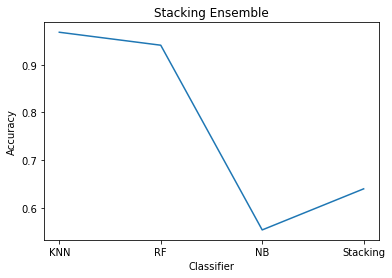

In [9]:
#plot classifier accuracy    
plt.figure()
plt.plot(clf_cv_mean)
plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()

In [12]:
print('##################################################### MNIST Data ##################################################')
print('Testing Accuracy :' , (scores[-1]*100) , '%')

##################################################### MNIST Data ##################################################
Testing Accuracy : 63.02773134456303 %
